In [12]:
import pandas as pd
import numpy as np
#import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
#from matplotlib import style
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.utils import shuffle
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
#from pandas.plotting import scatter_matrix
#from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
data = pd.read_csv('student-mat.csv', sep=";")
categorical_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian',
                       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
encoded_df = pd.get_dummies(data, columns=categorical_columns, drop_first=True)


Best Number of Estimators for Random Forest Model: 50
R-squared (R2) Score on Test Set(Random Forest Model): 0.13131219451059029
Mean Squared Error (Random Forest Model): 17.32815


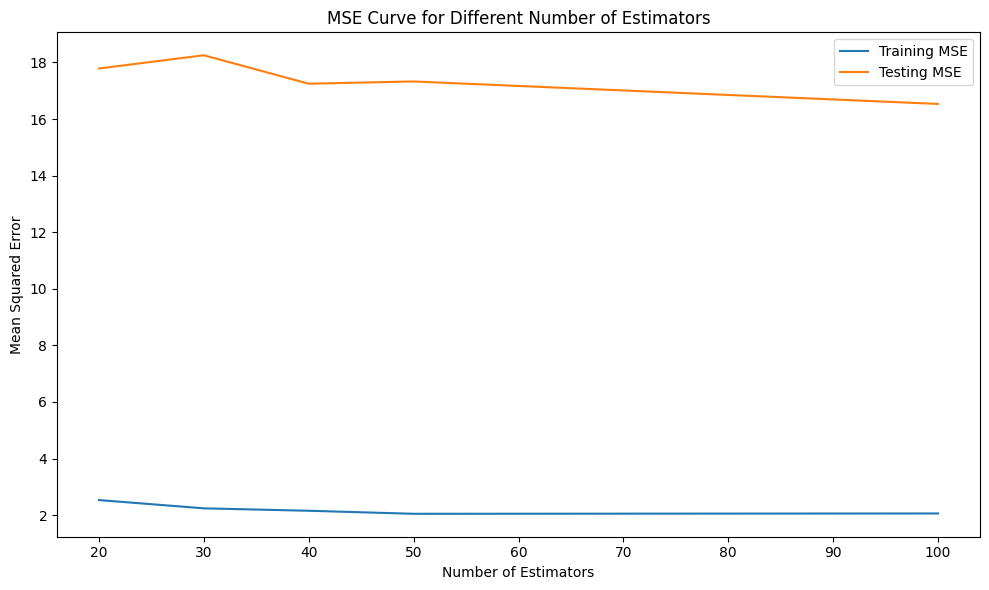

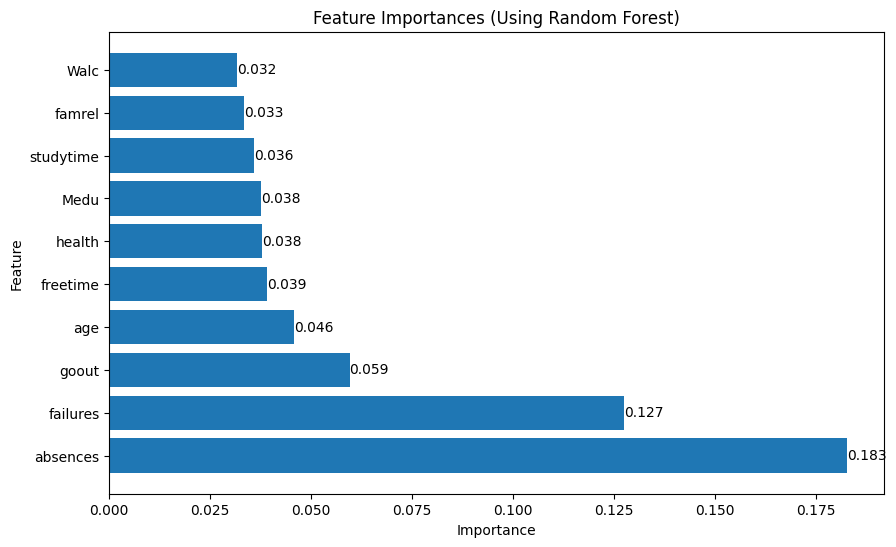

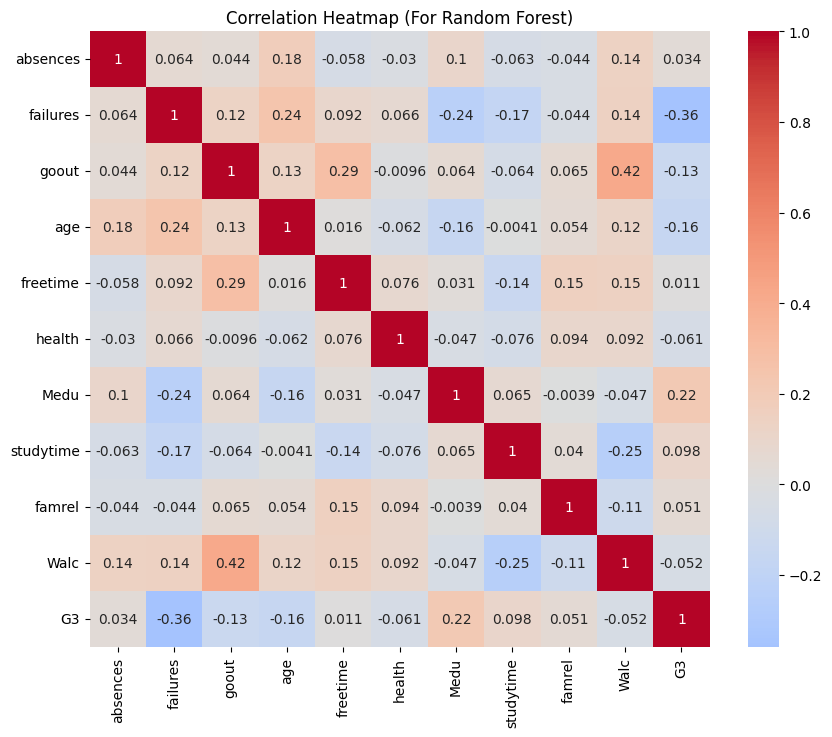

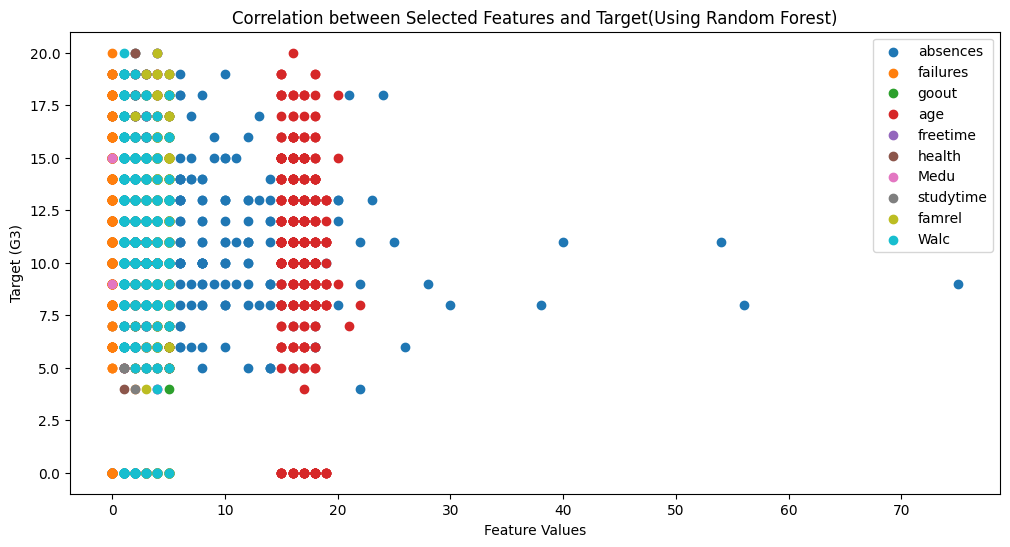

In [13]:
X = encoded_df.drop(['G3', 'G2', 'G1'], axis=1)
Y = encoded_df['G3']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=20)
'''param_grid = {'n_estimators': [20,30,40,50, 100]}
model = RandomForestRegressor(random_state=0)

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

best_n_estimators = grid_search.best_params_['n_estimators']

best_model = RandomForestRegressor(n_estimators=best_n_estimators, random_state=0)
best_model.fit(x_train, y_train)

r2_test = best_model.score(x_test, y_test)
y_pred = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
'''
param_grid = {'n_estimators': [20, 30, 40, 50, 100]}
model = RandomForestRegressor(random_state=0)

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

best_n_estimators = grid_search.best_params_['n_estimators']

best_model = RandomForestRegressor(n_estimators=best_n_estimators, random_state=0)
best_model.fit(x_train, y_train)

r2_test = best_model.score(x_test, y_test)
y_pred = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)

# Plot MSE curve for different numbers of estimators
num_estimators = [20, 30, 40, 50, 100]  # Define the list of numbers of estimators
train_errors = []
test_errors = []

for n_estimators in num_estimators:
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=0)
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))
print("Best Number of Estimators for Random Forest Model:", best_n_estimators)
print("R-squared (R2) Score on Test Set(Random Forest Model):", r2_test)
print("Mean Squared Error (Random Forest Model):", mse)
plt.figure(figsize=(10, 6))
plt.plot(num_estimators, train_errors, label='Training MSE')
plt.plot(num_estimators, test_errors, label='Testing MSE')
plt.title('MSE Curve for Different Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.tight_layout()
plt.show()
# Visualize feature importances
feature_importances = best_model.feature_importances_
feature_names = X.columns
indices = np.argsort(feature_importances)[::-1]
top_n = 10  # Select top N features for visualization
selected_feature_indices = indices[:top_n]
selected_feature_names = feature_names[selected_feature_indices]

plt.figure(figsize=(10, 6))
plt.barh(range(top_n), feature_importances[selected_feature_indices], align='center')
plt.yticks(range(top_n), selected_feature_names)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances (Using Random Forest)')
for index, value in enumerate(feature_importances[selected_feature_indices]):
    plt.text(value, index, f'{value:.3f}', va='center')
plt.show()

# Calculate correlation matrix and plot heatmap
selected_features_df = pd.DataFrame(X[selected_feature_names])
selected_features_df['G3'] = Y

correlation_matrix = selected_features_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap (For Random Forest)')
plt.show()

# Plot correlation graph between selected features and target
plt.figure(figsize=(12, 6))
for feature in selected_feature_names:
    plt.scatter(selected_features_df[feature], selected_features_df['G3'], label=feature)
plt.xlabel('Feature Values')
plt.ylabel('Target (G3)')
plt.title('Correlation between Selected Features and Target(Using Random Forest)')
plt.legend()
plt.show()

Selected RFE Features: 12
Cross-validated R-squared (R2) Score: 0.12205933131160776
R-squared (R2) Score on Test Set (Using Linear Regression): 0.20129454115200074
Mean Squared Error (Using Linear Regression): 15.932177140370465


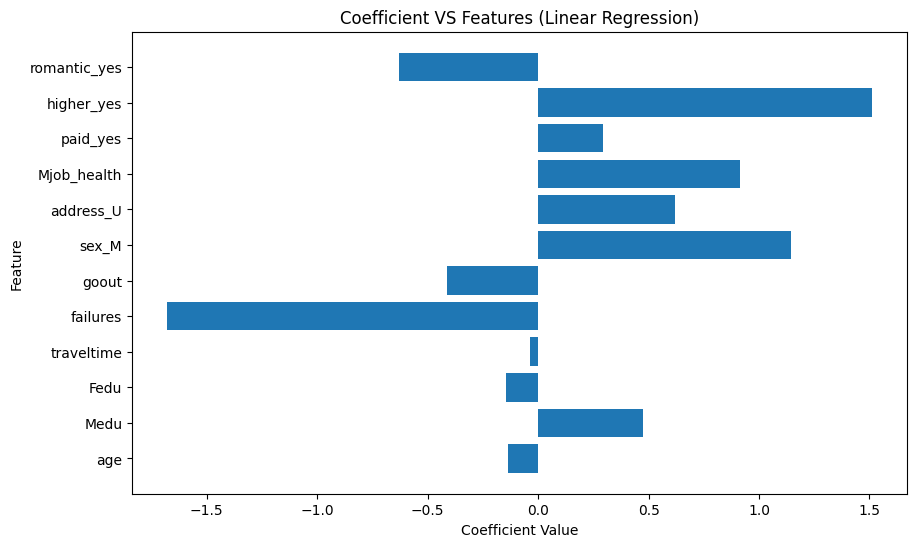

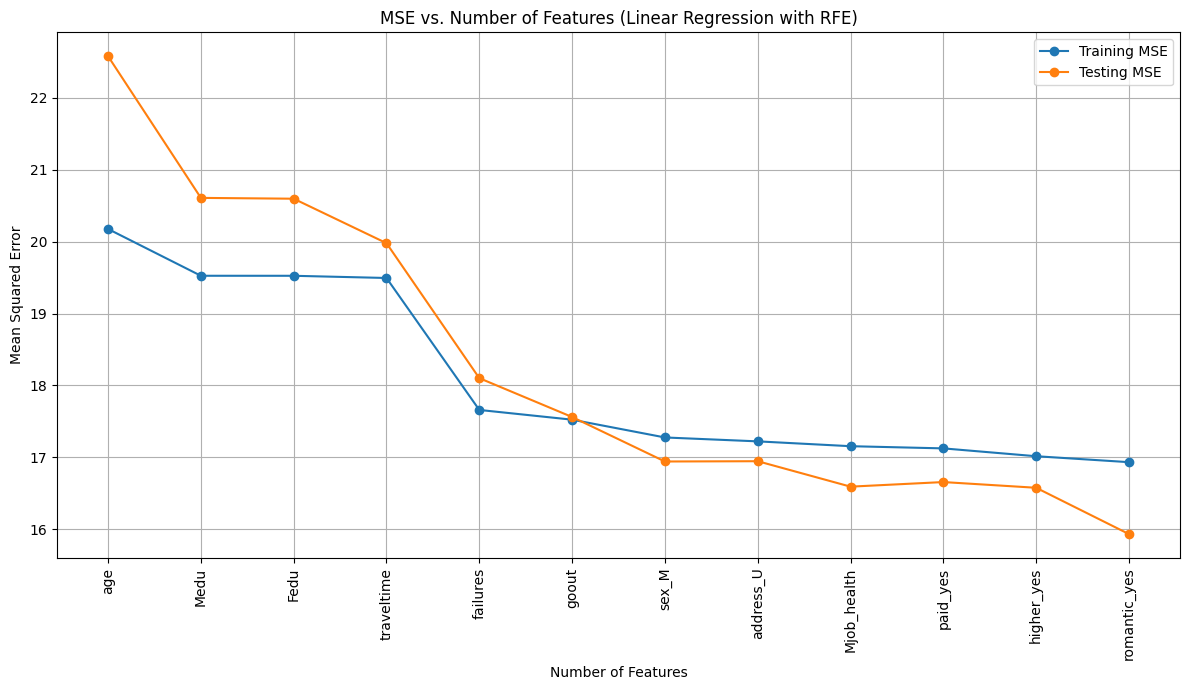

In [14]:
correlation_matrix = X.corrwith(Y)
correlation_threshold = 0.1
selected_features = correlation_matrix[abs(correlation_matrix) >= correlation_threshold]
#print("Selected Features:", selected_features.index.tolist())
X_selected = X[selected_features.index]
x_train, x_test, y_train, y_test = train_test_split(X_selected, Y, test_size=0.1, random_state=20)
model = LinearRegression()
model.fit(x_train, y_train) #Modified
rfe = RFE(model, n_features_to_select=len(X_selected))
rfe.fit(x_train, y_train)

selected_feature_indices = np.where(rfe.support_)[0]
selected_rfe_features = x_train.columns[selected_feature_indices]
print("Selected RFE Features:", len(selected_rfe_features))
model.fit(x_train[selected_rfe_features], y_train)
r2_test = model.score(x_test[selected_rfe_features], y_test)
y_pred_lr = model.predict(x_test[selected_rfe_features])
mse = mean_squared_error(y_test, y_pred_lr)
r2_scores = cross_val_score(model, X[selected_rfe_features], Y, cv=5, scoring='r2')
cross_val_r2 = np.mean(r2_scores)
#print("Selected RFE Features:", selected_rfe_features)
print("Cross-validated R-squared (R2) Score:", cross_val_r2)
print("R-squared (R2) Score on Test Set (Using Linear Regression):", r2_test)
print("Mean Squared Error (Using Linear Regression):", mse)
model.fit(x_train[selected_rfe_features], y_train)

# Get the coefficients of the selected features
coefficients = model.coef_

# Create a bar plot of the coefficients
plt.figure(figsize=(10, 6))
plt.barh(range(len(selected_rfe_features)), coefficients, align='center')
plt.yticks(range(len(selected_rfe_features)), selected_rfe_features)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Coefficient VS Features (Linear Regression)')
plt.show()
train_errors = []
test_errors = []

for n_features in range(1, len(selected_rfe_features) + 1):
    top_features = selected_rfe_features[:n_features]
    model.fit(x_train[top_features], y_train)
    y_train_pred = model.predict(x_train[top_features])
    y_test_pred = model.predict(x_test[top_features])
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

plt.figure(figsize=(12, 7))
plt.plot(range(1, len(selected_rfe_features) + 1), train_errors, '-o', label='Training MSE')
plt.plot(range(1, len(selected_rfe_features) + 1), test_errors, '-o', label='Testing MSE')
plt.title('MSE vs. Number of Features (Linear Regression with RFE)')
plt.xlabel('Number of Features')
plt.ylabel('Mean Squared Error')
plt.xticks(ticks=range(1, len(selected_rfe_features) + 1), labels=selected_rfe_features, rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Best Estimator for Gradient Boosting 20
R-squared (R2) Score on Test Set(Gardient Model): 0.052309929384107834
Mean Squared Error (Gardient Model): 18.904047683610507


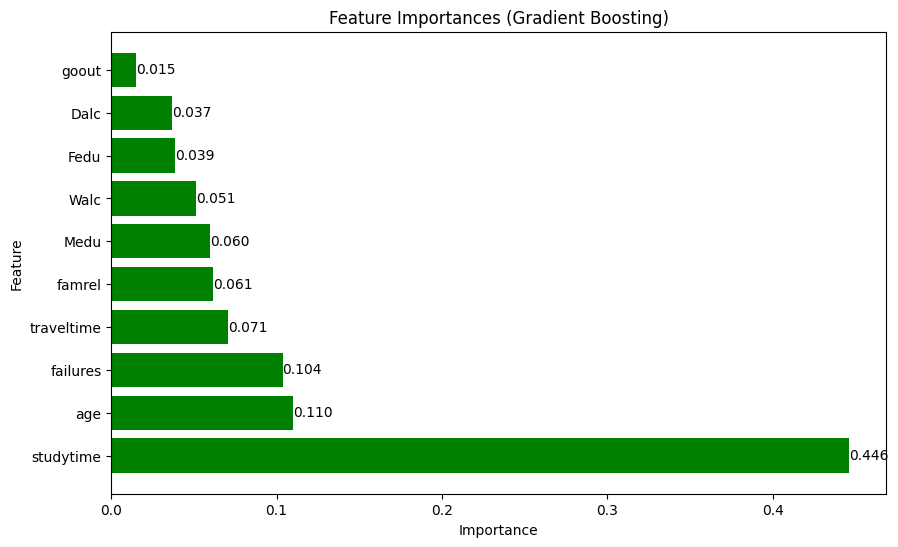

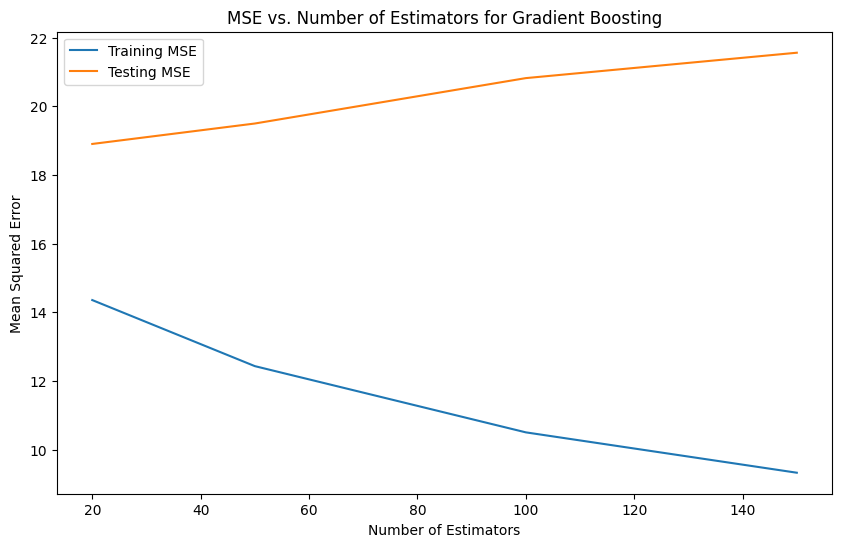

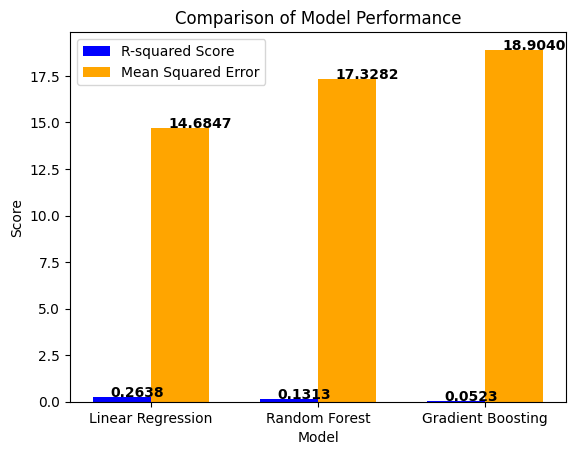

In [15]:


# Gradient Boosting Regressor setup and GridSearchCV
gb_model = GradientBoostingRegressor(random_state=0)
gb_param_grid = {'n_estimators': [20, 50, 100, 150]}
gb_grid_search = GridSearchCV(gb_model, gb_param_grid, cv=5, scoring='neg_mean_squared_error')
gb_grid_search.fit(x_train, y_train)
best_n_estimators_gb = gb_grid_search.best_params_['n_estimators']

best_gb_model = GradientBoostingRegressor(n_estimators=best_n_estimators_gb, random_state=0)
best_gb_model.fit(x_train, y_train)

# Evaluate the GradientBoostingRegressor model
r2_gb = best_gb_model.score(x_test, y_test)
y_pred_gb = best_gb_model.predict(x_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)

# Feature importance for Gradient Boosting
top_n = 10
gb_feature_importances = best_gb_model.feature_importances_
gb_indices = np.argsort(gb_feature_importances)[::-1]
gb_selected_feature_indices = gb_indices[:top_n]
gb_selected_feature_names = X.columns[gb_selected_feature_indices]
print("Best Estimator for Gradient Boosting",best_n_estimators_gb)
print("R-squared (R2) Score on Test Set(Gardient Model):", r2_gb)
print("Mean Squared Error (Gardient Model):", mse_gb)
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), gb_feature_importances[gb_selected_feature_indices], align='center', color='green')
plt.yticks(range(top_n), gb_selected_feature_names)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances (Gradient Boosting)')
for index, value in enumerate(gb_feature_importances[gb_selected_feature_indices]):
    plt.text(value, index, f'{value:.3f}', va='center', color='black')
plt.show()

# MSE vs Number of Estimators for Gradient Boosting
num_estimators_gb = [20, 50, 100, 150]
train_errors_gb = []
test_errors_gb = []

for n_estimators in num_estimators_gb:
    gb_model = GradientBoostingRegressor(n_estimators=n_estimators, random_state=0)
    gb_model.fit(x_train, y_train)
    y_train_pred_gb = gb_model.predict(x_train)
    y_test_pred_gb = gb_model.predict(x_test)
    train_errors_gb.append(mean_squared_error(y_train, y_train_pred_gb))
    test_errors_gb.append(mean_squared_error(y_test, y_test_pred_gb))

plt.figure(figsize=(10, 6))
plt.plot(num_estimators_gb, train_errors_gb, label='Training MSE')
plt.plot(num_estimators_gb, test_errors_gb, label='Testing MSE')
plt.title('MSE vs. Number of Estimators for Gradient Boosting')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# Comparison of models using a bar chart
model_names = ['Linear Regression', 'Random Forest', 'Gradient Boosting']
r2_scores = [0.2638, 0.1313, r2_gb]
mse_scores = [14.6847, 17.3282, mse_gb]

bar_width = 0.35
index = np.arange(len(model_names))

plt.bar(index, r2_scores, bar_width, color='blue', label='R-squared Score')
plt.bar(index + bar_width, mse_scores, bar_width, color='orange', label='Mean Squared Error')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Comparison of Model Performance')
plt.xticks(index + bar_width / 2, model_names)
plt.legend()
for i, v in enumerate(r2_scores):
    plt.text(i - 0.07, v + 0.01, f'{v:.4f}', color='black', fontweight='bold')
for i, v in enumerate(mse_scores):
    plt.text(i + bar_width - 0.07, v + 0.01, f'{v:.4f}', color='black', fontweight='bold')
plt.show()


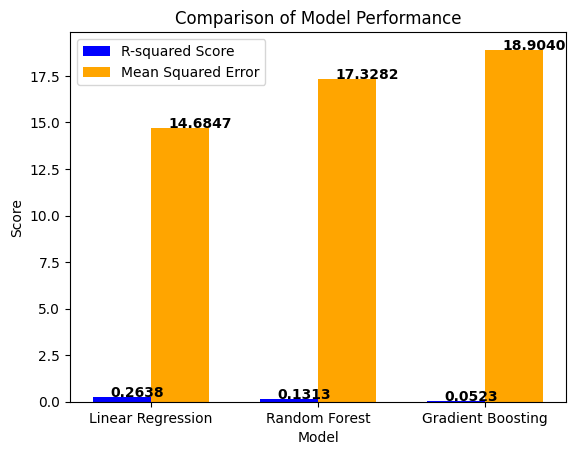

In [16]:

model_names = ['Linear Regression', 'Random Forest', 'Gradient Boosting']
r2_scores = [0.2638, 0.1313, r2_gb]
mse_scores = [14.6847, 17.3282, mse_gb]

bar_width = 0.35
index = np.arange(len(model_names))

plt.bar(index, r2_scores, bar_width, color='blue', label='R-squared Score')
plt.bar(index + bar_width, mse_scores, bar_width, color='orange', label='Mean Squared Error')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Comparison of Model Performance')
plt.xticks(index + bar_width / 2, model_names)
plt.legend()
for i, v in enumerate(r2_scores):
    plt.text(i - 0.07, v + 0.01, f'{v:.4f}', color='black', fontweight='bold')
for i, v in enumerate(mse_scores):
    plt.text(i + bar_width - 0.07, v + 0.01, f'{v:.4f}', color='black', fontweight='bold')
plt.show()


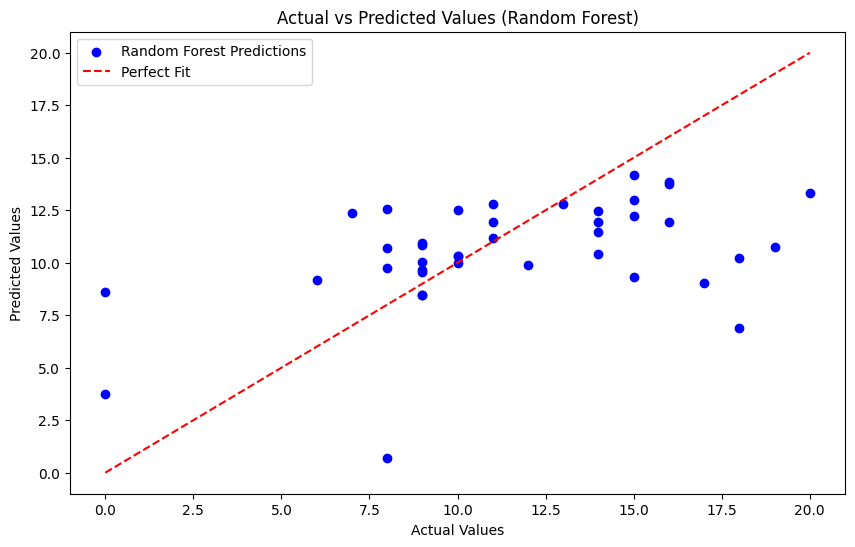

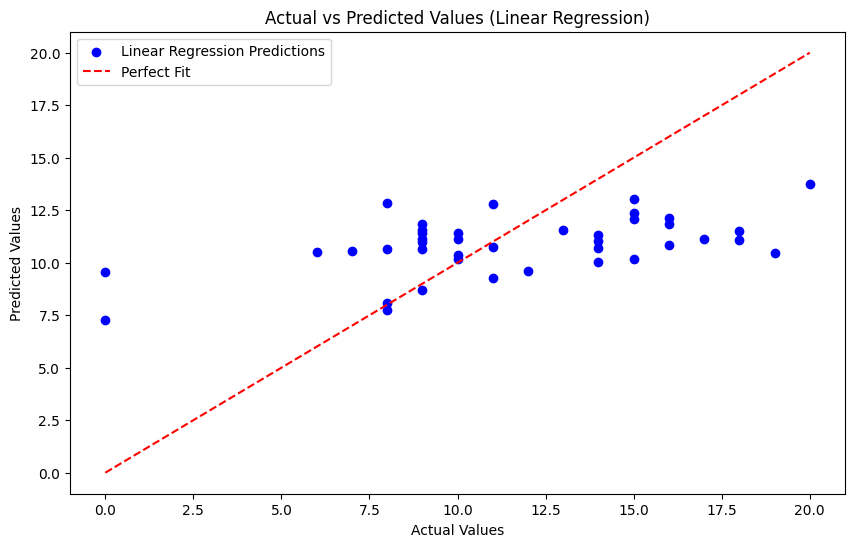

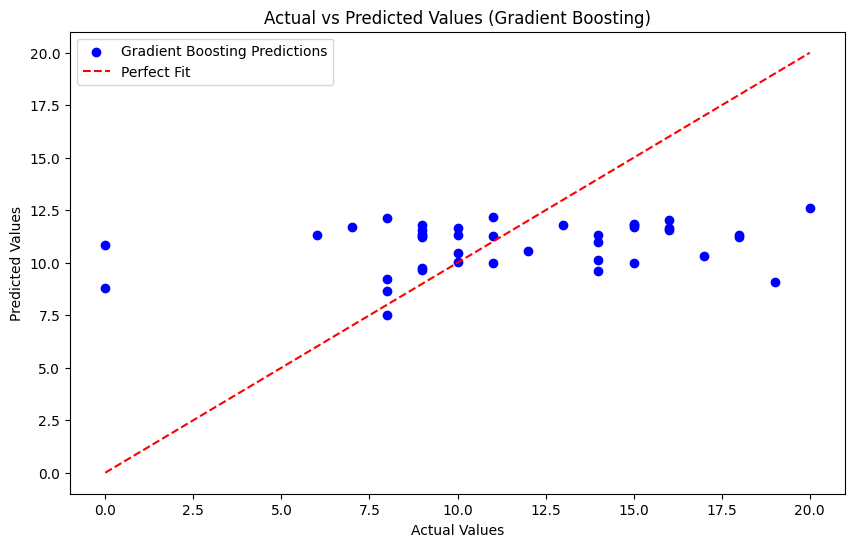

In [17]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Random Forest Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Random Forest)')
plt.legend()
plt.show()

# Plot actual vs predicted values for Linear Regression model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, color='blue', label='Linear Regression Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Linear Regression)')
plt.legend()
plt.show()

# Plot actual vs predicted values for Gradient Boosting model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, color='blue', label='Gradient Boosting Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Gradient Boosting)')
plt.legend()
plt.show()



